# Comienzo con ejemplos chafas para poder visualizar bien que hago

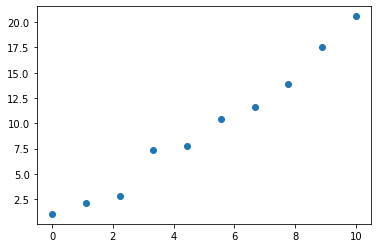

In [102]:
import numpy as np
import matplotlib.pyplot as plt
from operator import itemgetter


x = np.linspace(0,10,10)
y = np.linspace(0,20,10)+np.random.randn(1,10)
u = np.transpose(np.vstack([x,y]))

plt.scatter(u[:,0],u[:,1])

In [77]:
window=5

for ii in range(np.shape(u)[0]):
    focal_point = u[ii]
    r = sorted(abs(u-u[ii]), key=itemgetter(0), reverse=False)
    min_square = r[0]
    for jj in range(window-1):
        min_square = np.vstack([min_square,r[jj+1]])
    
    
    
    
    
    
    
    

In [78]:
min_square

array([[0.        , 0.        ],
       [1.11111111, 1.33904841],
       [2.22222222, 2.7660422 ],
       [3.33333333, 6.3406452 ],
       [4.44444444, 6.497801  ]])

# Aqui ya use la funcion predefinida en statsmodels.api

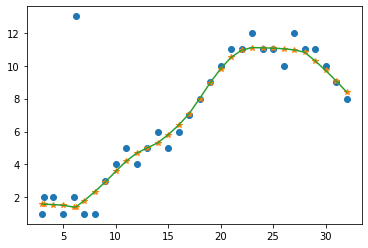

In [91]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
import statsmodels.api as sm

# introduce some floats in our x-values
x = list(range(3, 33)) + [3.2, 6.2]
y = [1,2,1,2,1,1,3,4,5,4,5,6,5,6,7,8,9,10,11,11,12,11,11,10,12,11,11,10,9,8,2,13]

# lowess will return our "smoothed" data with a y value for at every x-value
lowess = sm.nonparametric.lowess(y, x, frac=.3)

# unpack the lowess smoothed points to their values
lowess_x = list(zip(*lowess))[0]
lowess_y = list(zip(*lowess))[1]

# run scipy's interpolation. There is also extrapolation I believe
f = interp1d(lowess_x, lowess_y, bounds_error=False)

xnew = [i/10. for i in range(400)]

# this this generate y values for our xvalues by our interpolator
# it will MISS values outsite of the x window (less than 3, greater than 33)
# There might be a better approach, but you can run a for loop
#and if the value is out of the range, use f(min(lowess_x)) or f(max(lowess_x))
ynew = f(xnew)


plt.plot(x, y, 'o')
plt.plot(lowess_x, lowess_y, '*')
plt.plot(xnew, ynew, '-')
plt.show()

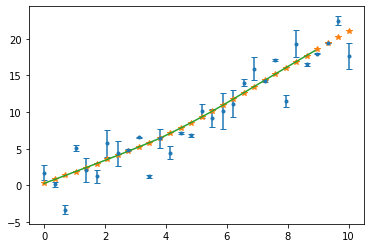

In [186]:
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d
import numpy as np
import statsmodels.api as sm

x = np.linspace(0,10,30)
y = np.linspace(0,20,30)+np.random.randn(1,30)*2
y_err = np.reshape(np.random.randn(1,30),[1,np.shape(x)[0]])[0]

u = np.transpose(np.vstack([x,y]))
np.reshape(u,[np.shape(x)[0],2])

lowess = sm.nonparametric.lowess(u[:,1], u[:,0], frac=.8)
#lowess_x = list(zip(*lowess))[0]
#lowess_y = list(zip(*lowess))[1]
lowess_x = lowess[:,0]
lowess_y = lowess[:,1]

f = interp1d(lowess_x, lowess_y, bounds_error=False)
xnew = [i/10. for i in range(90)]
ynew = f(xnew)


#plt.plot(u[:,0],u[:,1] , 'o')
plt.errorbar(u[:,0],u[:,1],yerr=y_err, fmt='.',capsize=3)
#plt.fill_between(u[:,0],u[:,1]-y_err,u[:,1]+y_err)
plt.plot(lowess_x, lowess_y, '*')
plt.plot(xnew, ynew, '-')
plt.show()

In [187]:
def loess_simex(x_l,y_l,y_err):
    lowess = sm.nonparametric.lowess(u[:,1], u[:,0], frac=.8)
    #lowess_x = list(zip(*lowess))[0]
    #lowess_y = list(zip(*lowess))[1]
    lowess_x = lowess[:,0]
    lowess_y = lowess[:,1]

    f = interp1d(lowess_x, lowess_y, bounds_error=False)
    #xnew = [i/10. for i in range(100)]
    ynew = f(lowess_x)
    return lowess_x, lowess_y, ynew


    

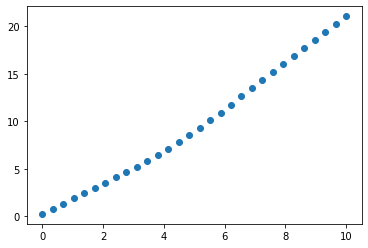

In [190]:
plt.scatter(loess(u[:,0],u[:,1],y_err)[0], loess(u[:,0],u[:,1],y_err)[1])